# Classification Challenge (My Contribution)

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sip
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import statsmodels.api as sm
import warnings
import os
import json
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

## Review the data

In [2]:
#load the data
data = pd.read_csv('wine.csv')

#view the head of the dataset
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## Satatistical Summaries

In [4]:
data.describe(include='all')

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

178 entries of observation was made for each features

In [6]:
data.shape

(178, 14)

There are 13 numeric features with no categorical features present

In [7]:
data.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline', 'WineVariety'],
      dtype='object')

In [8]:
# Define the features and the label(classification)
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline']
labels = ['WineVariety']


## EDA


Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

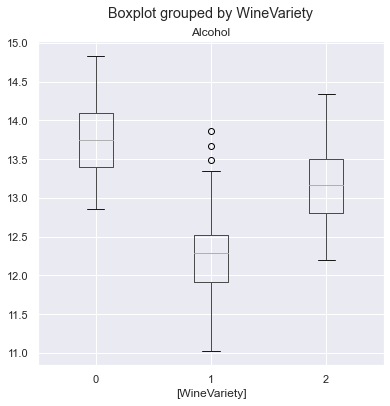

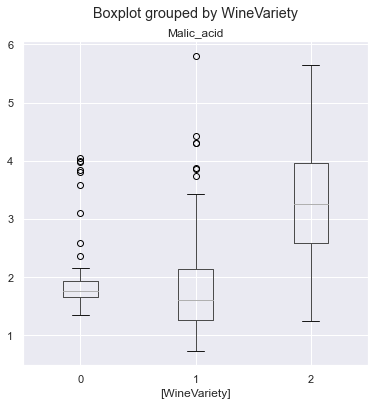

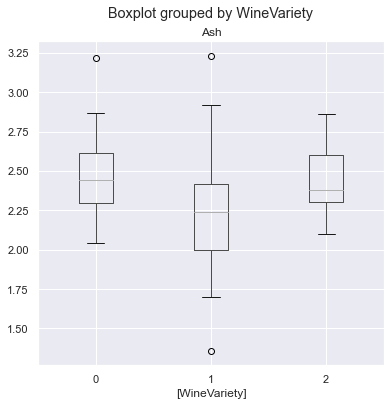

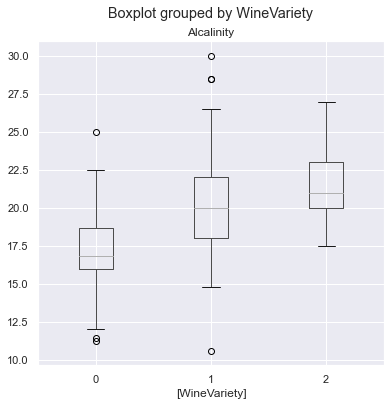

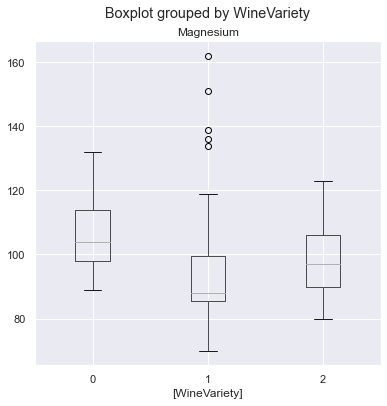

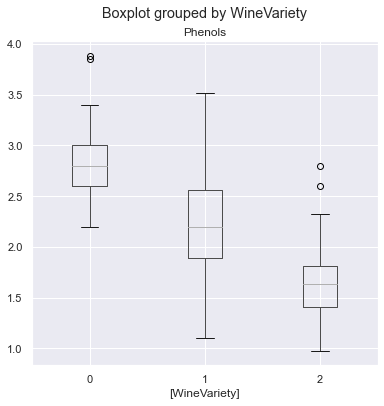

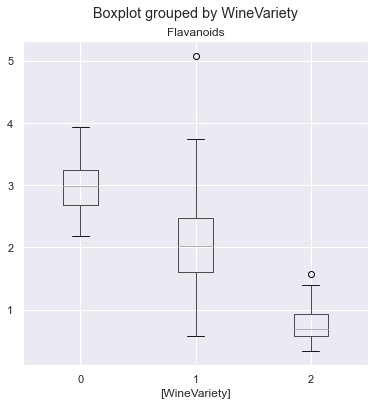

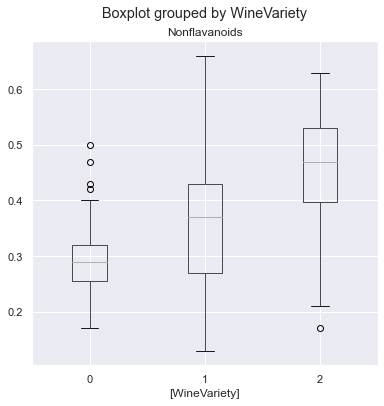

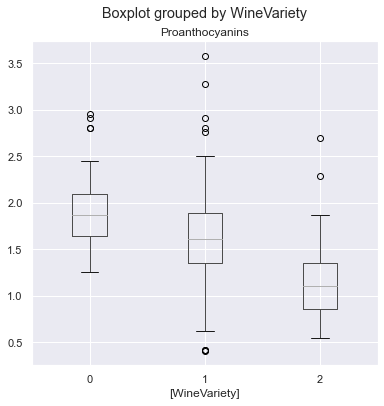

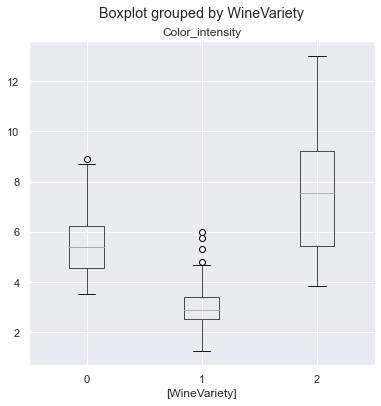

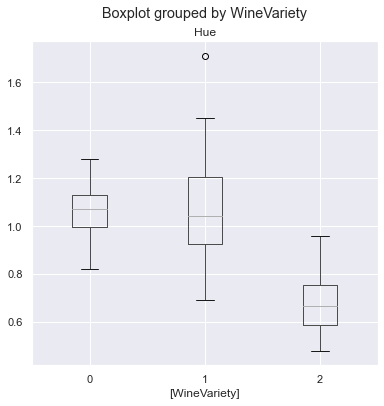

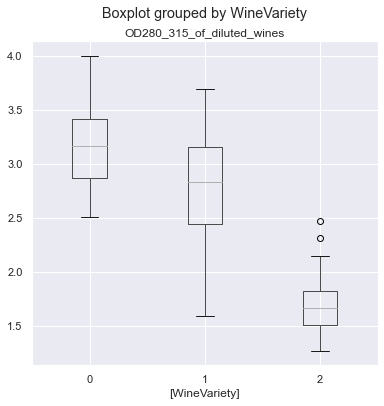

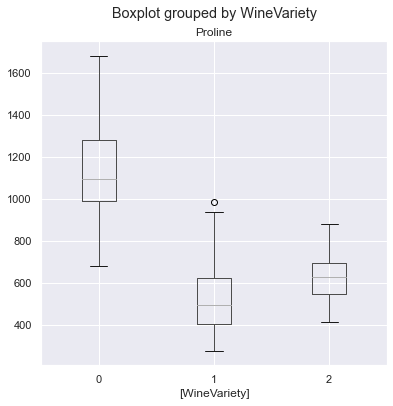

In [10]:
# Compare the feature distribution
for col in features:
    data.boxplot(column=col, by=labels, figsize=(6,6))
    plt.title(col)
plt.show()

All features are significant in the predictive process

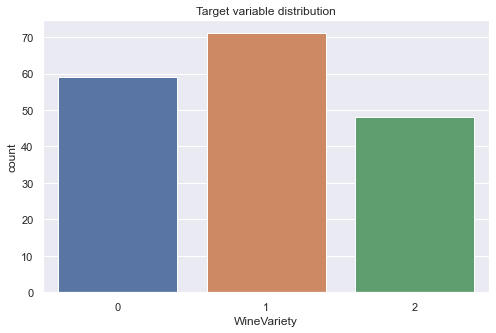

In [11]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data["WineVariety"])
plt.title('Target variable distribution')
plt.show()

The class labels are balanced on all ranges

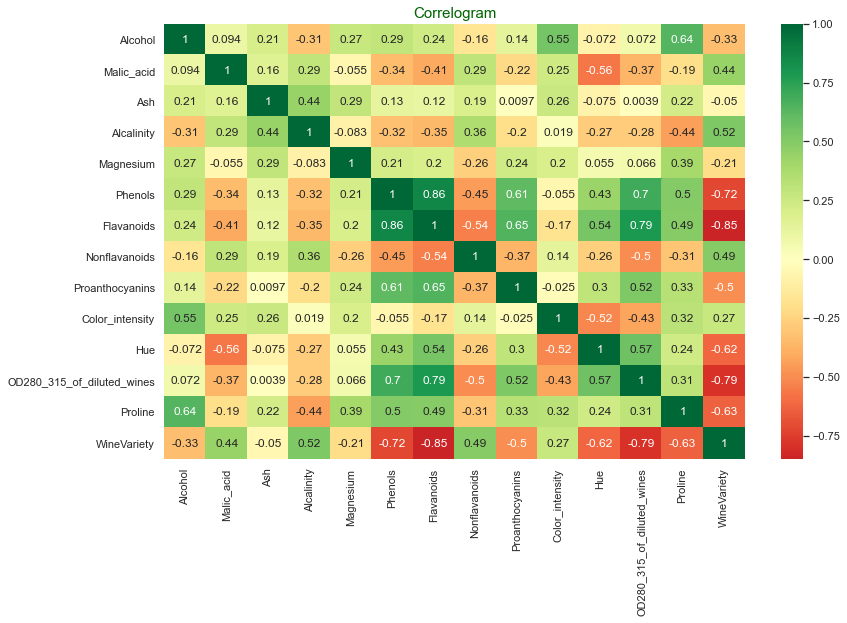

In [12]:
# Quantify correlations
corr = data.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Positive correlation are seen in majority of features

All preprocessing steps will be done in the machine learning pipeline

## Preparing the data

In [13]:
# Splitting the data set into a training and validation/test set
data.shape

(178, 14)

In [15]:
train = data.loc[:124,:]
test = data.loc[125:,:]

# view the datasets shapes
print(train.shape,test.shape)

(125, 14) (53, 14)


## Machine Learning Pipeline and Algorithm

In [16]:
from sklearn.model_selection import train_test_split

X = train[features]
y = train[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,3,4,6,9,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
LRmodel = pipeline.fit(X_train, y_train)
print (LRmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 6, 9, 12])])),
                ('regressor', LogisticRegression())])


Overall Accuracy: 0.9473684210526315
Overall Precision: 0.95
Overall Recall: 0.95


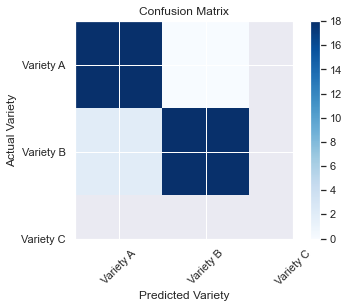

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# Get predictions from test data
LRpredictions = LRmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, LRpredictions))
print("Overall Precision:",precision_score(y_test, LRpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, LRpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, LRpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

## RandomForestClassifier Algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,3,4,6,9,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
RFmodel = pipeline.fit(X_train, y_train)
print (RFmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 6, 9, 12])])),
                ('classifier', RandomForestClassifier(random_state=0))])


Overall Accuracy: 0.9736842105263158
Overall Precision: 0.9761904761904762
Overall Recall: 0.9722222222222222


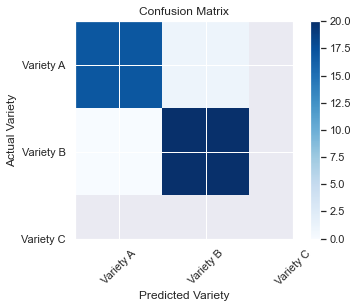

In [40]:
# Get predictions from test data
RFCpredictions = RFmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, RFCpredictions))
print("Overall Precision:",precision_score(y_test, RFCpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, RFCpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, RFCpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

## DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
# Define preprocessing for numeric columns (scale them)
feature_columns = [0,3,4,6,9,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=0))])


# fit the pipeline to train a linear regression model on the training set
DTCmodel = pipeline.fit(X_train, y_train)
print (DTCmodel)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 3, 4, 6, 9, 12])])),
                ('classifier', DecisionTreeClassifier(random_state=0))])


Overall Accuracy: 0.9736842105263158
Overall Precision: 0.9761904761904762
Overall Recall: 0.9722222222222222


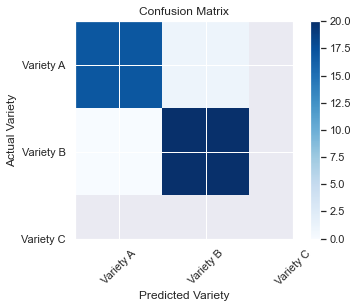

In [42]:
# Get predictions from test data
DTCpredictions = DTCmodel.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, DTCpredictions))
print("Overall Precision:",precision_score(y_test, DTCpredictions, average='macro'))
print("Overall Recall:",recall_score(y_test, DTCpredictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, DTCpredictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

The challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

So far, LogisticRegression model has produced the best perfomance with an overall score of 0.95

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
LRpredprob = LRmodel.predict_proba(X_test)

auc = roc_auc_score(y_test, LRpredprob , multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, LRpredprob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Saving the best model (LogisticRegression)

In [46]:
import joblib

# Creating the file directory
filename = './Model_with_the_best_overall_recall_0.95.pkl'

# Saving the model in this file
joblib.dump(LRmodel,filename)

['./Model_with_the_best_overall_recall_0.95.pkl']

## Use the model with new data observation

In [62]:
import joblib

# Load the saved model
model = joblib.load(filename)

# Get predictions for two new wine samples
test_case = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

# Call the web service, passing the input data
predictions = model.predict(test_case)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
